In [74]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext lab_black

In [75]:
bc_atac = list(
    pd.read_csv(
        "/lustre1/project/res_00001/barcodes/cellranger_arc_atac.737K-arc-v1.REV_COMP.txt",
        header=None,
    )[0]
)
bc_rna = list(
    pd.read_csv(
        "/lustre1/project/res_00001/barcodes/cellranger_arc_rna.737K-arc-v1.txt",
        header=None,
    )[0]
)

atac2rna = {bc1: bc2 for bc1, bc2 in zip(bc_atac, bc_rna)}
rna2atac = {bc1: bc2 for bc1, bc2 in zip(bc_rna, bc_atac)}


def reverse_complement(dna):
    complement = {"A": "T", "C": "G", "G": "C", "T": "A", "_": "_"}
    return "".join([complement[base] for base in reversed(dna)])


rna2atac_revcomp = {bc1: bc2 for bc1, bc2 in zip(bc_rna, bc_atac)}

In [78]:
predictions_path_dict = {
    x.split("/")[-1].split("__")[0]: x
    for x in sorted(glob.glob("rna_qc/10xmerged__seurat_annotations.txt"))
}
predictions_path_dict

{'10xmerged': 'rna_qc/10xmerged__seurat_annotations.txt'}

In [79]:
cell_data_path_dict = {
    x.split("/")[-1].split(".")[0]: x
    for x in sorted(
        glob.glob(
            "../fixedcells_3_cistopic_consensus/cistopic_objects/*multiome*.consensus.cell_data.tsv"
        )
    )
}
cell_data_path_dict

{'CNA_10xmultiome_1': '../fixedcells_3_cistopic_consensus/cistopic_objects/CNA_10xmultiome_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_10topics.dimreduc.consensus.cell_data.tsv',
 'CNA_10xmultiome_2': '../fixedcells_3_cistopic_consensus/cistopic_objects/CNA_10xmultiome_2.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_8topics.dimreduc.consensus.cell_data.tsv',
 'SAN_10xmultiome_1': '../fixedcells_3_cistopic_consensus/cistopic_objects/SAN_10xmultiome_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_7topics.dimreduc.consensus.cell_data.tsv',
 'SAN_10xmultiome_2': '../fixedcells_3_cistopic_consensus/cistopic_objects/SAN_10xmultiome_2.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_10topics.dimreduc.consensus.cell_data.tsv',
 'VIB_10xmultiome_1': '../fixedcells_3_cistopic_consensus/cistopic_objects/VIB_10xmultiome_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_9topics.dimreduc.consensus.cell_data.tsv',
 'VIB_10xmultiome_2': '../fixedcells_3_cistopic_consensus/cistopic_objects/VIB_10xm

CNA_10xmultiome_1
3226
rna_seurat_annotation  rna_atac_seurat_consensus
B cell                 True                         333
                       False                         28
CD14+ monocyte         True                         560
                       False                         80
CD16+ monocyte         True                         183
                       False                         60
CD4+ T cell            True                         846
                       False                        330
Cytotoxic T cell       True                         290
                       False                        125
Dendritic cell         False                         12
                       True                          11
Natural killer cell    True                         244
                       False                        124
Name: rna_atac_seurat_consensus, dtype: int64


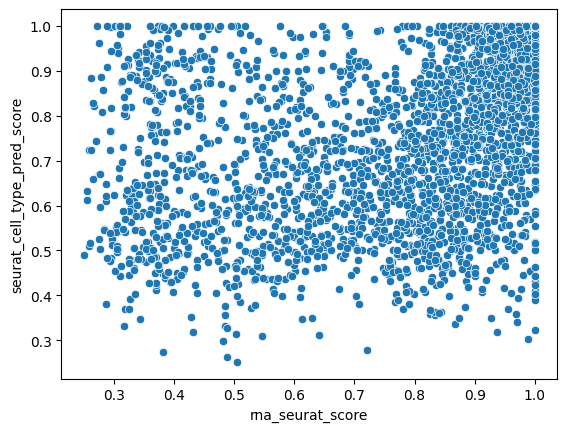

CNA_10xmultiome_2
2949
rna_seurat_annotation  rna_atac_seurat_consensus
B cell                 True                         222
                       False                         42
CD14+ monocyte         True                         584
                       False                        233
CD16+ monocyte         True                         196
                       False                         66
CD4+ T cell            True                         674
                       False                        200
Cytotoxic T cell       True                         253
                       False                        117
Dendritic cell         False                         25
                       True                          19
Natural killer cell    True                         197
                       False                        121
Name: rna_atac_seurat_consensus, dtype: int64


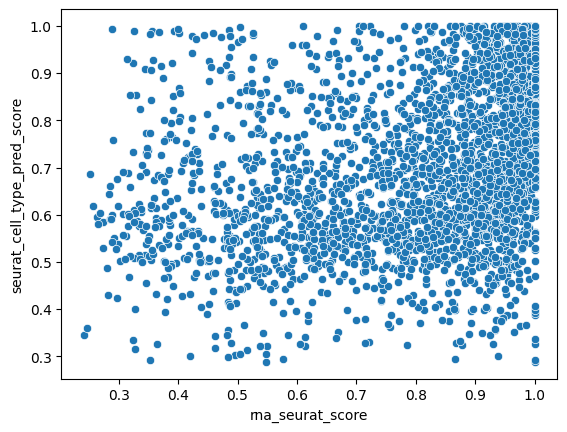

SAN_10xmultiome_1
3072
rna_seurat_annotation  rna_atac_seurat_consensus
B cell                 True                         328
                       False                         24
CD14+ monocyte         True                         871
                       False                         60
CD16+ monocyte         True                         124
                       False                         23
CD4+ T cell            True                         816
                       False                         87
Cytotoxic T cell       True                         304
                       False                        118
Dendritic cell         True                          11
                       False                          3
Natural killer cell    True                         219
                       False                         84
Name: rna_atac_seurat_consensus, dtype: int64


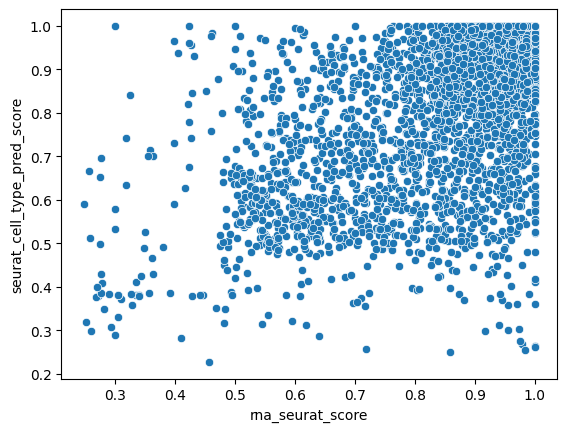

SAN_10xmultiome_2
3776
rna_seurat_annotation  rna_atac_seurat_consensus
B cell                 True                          468
                       False                          39
CD14+ monocyte         True                          991
                       False                          78
CD16+ monocyte         True                          166
                       False                          44
CD4+ T cell            True                         1047
                       False                          76
Cytotoxic T cell       True                          387
                       False                         137
Dendritic cell         True                            8
                       False                           5
Natural killer cell    True                          265
                       False                          65
Name: rna_atac_seurat_consensus, dtype: int64


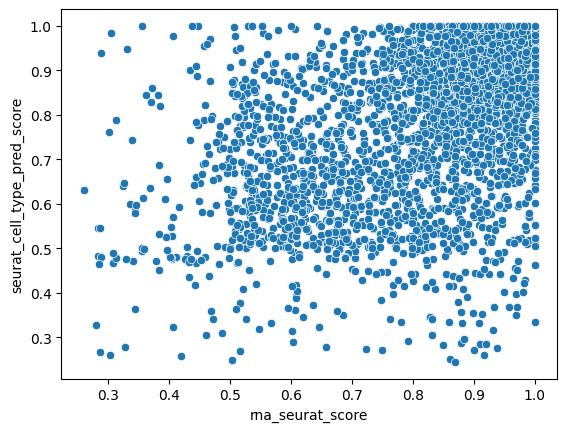

VIB_10xmultiome_1
1153
rna_seurat_annotation  rna_atac_seurat_consensus
B cell                 True                         140
                       False                         12
CD14+ monocyte         True                         233
                       False                         32
CD16+ monocyte         True                          42
                       False                         14
CD4+ T cell            True                         372
                       False                         27
Cytotoxic T cell       True                         146
                       False                         32
Dendritic cell         False                          6
                       True                           2
Natural killer cell    True                          73
                       False                         22
Name: rna_atac_seurat_consensus, dtype: int64


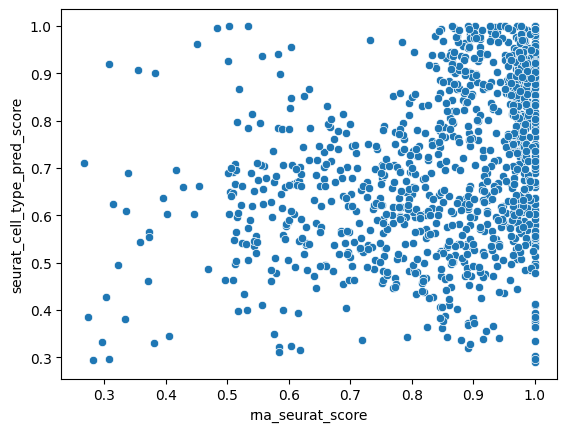

VIB_10xmultiome_2
1877
rna_seurat_annotation  rna_atac_seurat_consensus
B cell                 True                         202
                       False                         11
CD14+ monocyte         True                         466
                       False                         17
CD16+ monocyte         True                          63
                       False                         24
CD4+ T cell            True                         524
                       False                        103
Cytotoxic T cell       True                         252
                       False                         49
Dendritic cell         False                          6
                       True                           6
Natural killer cell    True                         101
                       False                         53
Name: rna_atac_seurat_consensus, dtype: int64


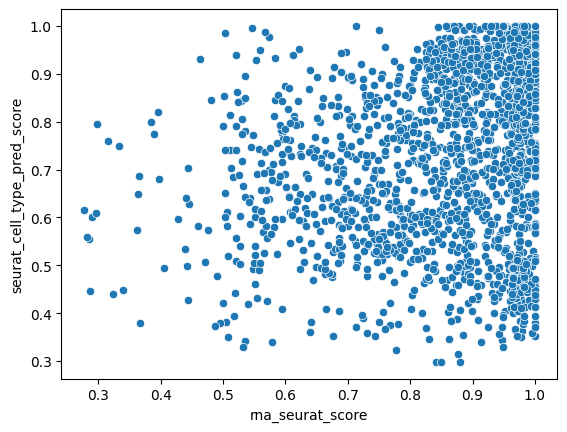

In [81]:
cell_data_df_merged = pd.DataFrame()

seurat_annotations_df = pd.read_csv(
    predictions_path_dict["10xmerged"], sep="\t", index_col=0
)
seurat_annotations_df["sample_id"] = [
    x.split("-1-")[-1].split("__")[0] for x in seurat_annotations_df.index
]
for sample, cell_data_path in cell_data_path_dict.items():
    print(sample)
    cell_data_df = pd.read_csv(cell_data_path, sep="\t", index_col=0)
    cell_data_df.index = [x.split("__")[0] for x in cell_data_df.index]

    seurat_annotations_df_sub = seurat_annotations_df[
        seurat_annotations_df["sample_id"] == sample
    ]
    seurat_annotations_df_sub.index = [
        x.split("-")[0] for x in seurat_annotations_df_sub.index
    ]
    if "SAN" not in sample:
        seurat_annotations_df_sub.index = [
            rna2atac.get(x.split("-")[0], "test")
            for x in seurat_annotations_df_sub.index
        ]
    else:
        seurat_annotations_df_sub.index = [
            reverse_complement(rna2atac_revcomp.get(x.split("-")[0], "test"))
            for x in seurat_annotations_df_sub.index
        ]

    common_barcodes = list(
        set(seurat_annotations_df_sub.index).intersection(set(cell_data_df.index))
    )
    #     print(len(common_barcodes))
    #     with open(f'rna_qc/{sample}__common_barcodes_atac.txt', 'w') as fp:
    #         for item in common_barcodes:
    #             # write each item on a new line
    #             fp.write("%s\n" % item)
    #         print('Done')

    if "SAN" not in sample:
        common_barcodes_rna = [
            atac2rna.get(x.split("-")[0], "test") for x in common_barcodes
        ]
    else:
        common_barcodes_rna = [reverse_complement(x) for x in common_barcodes]
        common_barcodes_rna = [
            atac2rna.get(x.split("-")[0], "test") for x in common_barcodes
        ]

    print(len(common_barcodes_rna))

    #     with open(f'rna_qc/{sample}__common_barcodes_rna.txt', 'w') as fp:
    #         for item in common_barcodes:
    #             # write each item on a new line
    #             fp.write("%s\n" % item)
    #         print('Done')
    cell_data_df = cell_data_df.loc[common_barcodes]
    seurat_annotations_df_sub = seurat_annotations_df_sub.loc[common_barcodes]
    cell_data_df["rna_seurat_annotation"] = seurat_annotations_df_sub["cell_type"]
    cell_data_df["rna_seurat_score"] = seurat_annotations_df_sub["cell_type_pred_score"]
    cell_data_df["rna_atac_seurat_consensus"] = (
        cell_data_df["seurat_cell_type"] == cell_data_df["rna_seurat_annotation"]
    )
    print(
        cell_data_df.groupby("rna_seurat_annotation")[
            "rna_atac_seurat_consensus"
        ].value_counts()
    )
    sns.scatterplot(
        data=cell_data_df, x="rna_seurat_score", y="seurat_cell_type_pred_score"
    )
    plt.show()
    plt.close()

    cell_data_df_merged = pd.concat([cell_data_df_merged, cell_data_df])

In [82]:
cell_data_df_merged.columns

Index(['cisTopic_nr_acc', 'cisTopic_nr_frag', 'cisTopic_log_nr_acc',
       'cisTopic_log_nr_frag', 'Log_total_nr_frag', 'Log_unique_nr_frag',
       'Total_nr_frag', 'Unique_nr_frag', 'Dupl_nr_frag', 'Dupl_rate',
       'Total_nr_frag_in_regions', 'Unique_nr_frag_in_regions', 'FRIP',
       'TSS_enrichment', 'sample_id', 'barcode', 'Doublet_scores_fragments',
       'Predicted_doublets_fragments', 'fmx_droplet_type', 'fmx_sample',
       'seurat_cell_type', 'seurat_cell_type_pred_score',
       'pycisTopic_leiden_10_3.0', 'consensus_cell_type', 'UMAP_1', 'UMAP_2',
       'tSNE_1', 'tSNE_2', 'rna_seurat_annotation', 'rna_seurat_score',
       'rna_atac_seurat_consensus'],
      dtype='object')

In [84]:
cell_data_df_merged[
    ["seurat_cell_type_pred_score", "rna_atac_seurat_consensus", "seurat_cell_type"]
]

,seurat_cell_type_pred_score,rna_atac_seurat_consensus,seurat_cell_type
CCGCTTAGACTTACAT,0.992541,True,Cytotoxic T cell
AAATGACCTTAATGTC,0.963132,True,CD4+ T cell
CGCCAACTGATGACAG,0.979711,False,CD4+ T cell
AGCAAACTGCTCCAAA,0.762969,True,Natural killer cell
CCTAACCGAAGCAACC,0.654627,False,Dendritic cell
...,...,...,...
TAAGGCTGAACCTTGT,1.000000,True,CD14+ monocyte
TAGCATGGAGCTGCAA,0.396801,True,CD4+ T cell
GATGTAACTATGTGGG,0.637334,False,Cytotoxic T cell
TTTCAAGCTTCATGAT,0.763377,True,CD14+ monocyte


In [86]:
# Create a new column "bins" with the binned data
cell_data_df_merged["bins"] = pd.cut(
    cell_data_df_merged["seurat_cell_type_pred_score"],
    bins=pd.interval_range(start=0, end=1, periods=20),
)

# Group by bins and calculate the percentage of True values in "rna_atac_seurat_consensus"
result = cell_data_df_merged.groupby("bins")["rna_atac_seurat_consensus"].mean() * 100

# Display the result
print(result)

bins
(0.0, 0.05]                                         NaN
(0.05, 0.1]                                         NaN
(0.1, 0.15000000000000002]                          NaN
(0.15000000000000002, 0.2]                          NaN
(0.2, 0.25]                                    0.000000
(0.25, 0.30000000000000004]                   37.254902
(0.30000000000000004, 0.35000000000000003]    33.928571
(0.35000000000000003, 0.4]                    55.609756
(0.4, 0.45]                                   48.709677
(0.45, 0.5]                                   54.066986
(0.5, 0.55]                                   55.187835
(0.55, 0.6000000000000001]                    64.212329
(0.6000000000000001, 0.65]                    73.476395
(0.65, 0.7000000000000001]                    80.235721
(0.7000000000000001, 0.75]                    82.887701
(0.75, 0.8]                                   87.782805
(0.8, 0.8500000000000001]                     92.752506
(0.8500000000000001, 0.9]                  

In [87]:
df_bins = pd.DataFrame(result)

In [88]:
df_bins["cutoff"] = pd.interval_range(start=0, end=1, periods=20)

In [91]:
import numpy as np

bins = np.linspace(0, 1, 21)
last_items = [round(x, 2) for x in bins[:20]]

In [93]:
df_bins["threshold"] = last_items

<AxesSubplot: xlabel='threshold', ylabel='rna_atac_seurat_consensus'>

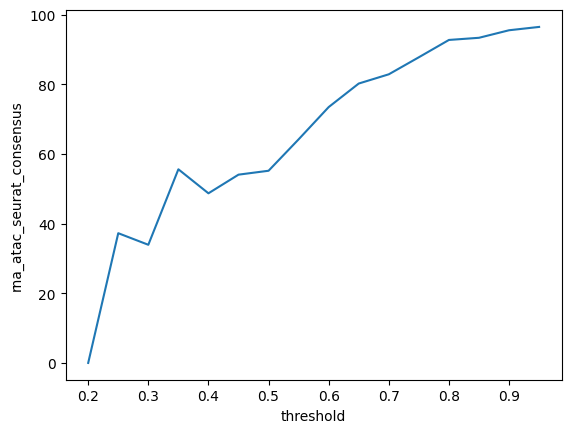

In [94]:
sns.lineplot(data=df_bins, x="threshold", y="rna_atac_seurat_consensus")

# per cell type

In [132]:
cell_data_df_merged["binned_score"] = pd.cut(
    cell_data_df_merged["seurat_cell_type_pred_score"],
    bins,
    include_lowest=True,
    right=False,
)
# Group by "consensus_cell_type" and "binned_score", and calculate the fraction of "True" values
grouped_df = cell_data_df_merged.groupby(["seurat_cell_type", "binned_score"]).agg(
    {"rna_atac_seurat_consensus": ["sum", "count"]}
)

# Calculate the fraction of "True" values and store it in a new column "fraction_true"
grouped_df["fraction_true"] = (
    grouped_df["rna_atac_seurat_consensus"]["sum"]
    / grouped_df["rna_atac_seurat_consensus"]["count"]
)

# Reset the index
grouped_df.reset_index(inplace=True)
grouped_df["bin_threshold"] = grouped_df["binned_score"].apply(lambda x: x.left)
grouped_df

seurat_cell_type binned_score rna_atac_seurat_consensus        \
                                                            sum count   
0                 B cell  [0.0, 0.05)                         0     0   
1                 B cell  [0.05, 0.1)                         0     0   
2                 B cell  [0.1, 0.15)                         0     0   
3                 B cell  [0.15, 0.2)                         0     0   
4                 B cell  [0.2, 0.25)                         0     2   
..                   ...          ...                       ...   ...   
135  Natural killer cell  [0.75, 0.8)                       124   150   
136  Natural killer cell  [0.8, 0.85)                       125   146   
137  Natural killer cell  [0.85, 0.9)                        92   104   
138  Natural killer cell  [0.9, 0.95)                        26    32   
139  Natural killer cell  [0.95, 1.0)                         3     3   

    fraction_true bin_threshold  
                                 
0             NaN          0.00  
1             NaN          0.05  
2             NaN          0.10  
3             NaN          0.15  
4        0.000000          0.20  
..            ...           ...  
135      0.826667          0.75  
136      0.856164          0.80  
137      0.884615          0.85  
138      0.812500          0.90  
139      1.000000          0.95  

[140 rows x 6 columns]

In [133]:
cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "Naive T cells",
    "Cytotoxic_T_cell": "Cytotoxic T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "Natural killer cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

cell_type_order = [
    "B_cell",
    "CD14+_monocyte",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Dendritic_cell",
    "Natural_killer_cell",
    "CD16+_monocyte",
]

cell_type_alias_order = [cell_type_alias_dict[x] for x in cell_type_order]

cell_type_color_dict = {
    "B_cell": "#88CCEE",
    "CD14+_monocyte": "#CC6677",
    "CD4+_T_cell": "#DDCC77",
    "Cytotoxic_T_cell": "#117733",
    "Dendritic_cell": "#332288",
    "Natural_killer_cell": "#AA4499",
    "CD16+_monocyte": "#44AA99",
}

cell_type_alias_color_dict = {
    cell_type_alias_dict[x]: cell_type_color_dict[x]
    for x in cell_type_color_dict.keys()
}

In [134]:
grouped_df["cell_type_alias"] = [
    cell_type_alias_dict[x.replace(" ", "_")] for x in grouped_df["seurat_cell_type"]
]

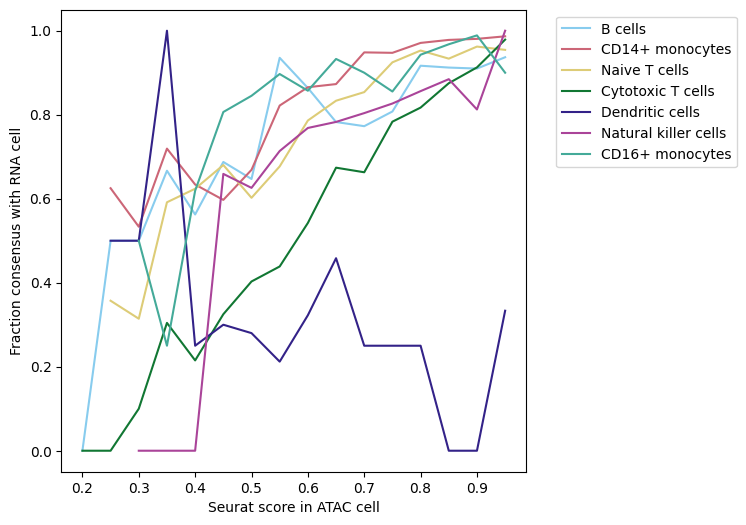

In [135]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.lineplot(
    data=grouped_df,
    x="bin_threshold",
    y="fraction_true",
    hue="cell_type_alias",
    hue_order=cell_type_alias_order,
    palette=cell_type_alias_color_dict,
    ax=ax,
)
ax.set_xlabel("Seurat score in ATAC cell")
ax.set_ylabel("Fraction consensus with RNA cell")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")

plt.savefig("seurat_validation.png", facecolor="white", dpi=600)
plt.savefig("seurat_validation.svg", facecolor="white", dpi=600)

make the bins right-inclusive

In [136]:
import pandas as pd
import numpy as np

thresholds = [x / 20 for x in range(1, 20)]


def true_fraction(df, threshold):
    filtered_df = df[df["seurat_cell_type_pred_score"] >= threshold]
    if len(filtered_df) > 0:
        return np.sum(filtered_df["rna_atac_seurat_consensus"]) / len(filtered_df)
    else:
        return np.nan


true_fractions = {
    threshold: true_fraction(cell_data_df_merged, threshold) for threshold in thresholds
}

true_fractions_df = pd.DataFrame(
    list(true_fractions.items()), columns=["threshold", "fraction_true"]
)
true_fractions_df

,threshold,fraction_true
0,0.05,0.824706
1,0.10,0.824706
2,0.15,0.824706
3,0.20,0.824706
4,0.25,0.824911
5,0.30,0.826353
6,0.35,0.829787
7,0.40,0.833365
8,0.45,0.840349
9,0.50,0.853093


In [137]:
import pandas as pd
import numpy as np

thresholds = [x / 20 for x in range(1, 20)]


def true_fraction_by_cell_type(df, cell_type, threshold):
    filtered_df = df[
        (df["seurat_cell_type"] == cell_type)
        & (df["seurat_cell_type_pred_score"] >= threshold)
    ]
    if len(filtered_df) > 0:
        return np.sum(filtered_df["rna_atac_seurat_consensus"]) / len(filtered_df)
    else:
        return np.nan


cell_types = cell_data_df_merged["seurat_cell_type"].unique()

true_fractions_by_cell_type = {
    (cell_type, threshold): true_fraction_by_cell_type(
        cell_data_df_merged, cell_type, threshold
    )
    for cell_type in cell_types
    for threshold in thresholds
}

true_fractions_by_cell_type_df = pd.DataFrame(
    [
        {"seurat_cell_type": ct, "threshold": thr, "fraction_true": frac}
        for (ct, thr), frac in true_fractions_by_cell_type.items()
    ]
)

true_fractions_by_cell_type_df

,seurat_cell_type,threshold,fraction_true
0,Cytotoxic T cell,0.05,0.596491
1,Cytotoxic T cell,0.10,0.596491
2,Cytotoxic T cell,0.15,0.596491
3,Cytotoxic T cell,0.20,0.596491
4,Cytotoxic T cell,0.25,0.596928
...,...,...,...
128,CD16+ monocyte,0.75,0.938312
129,CD16+ monocyte,0.80,0.965517
130,CD16+ monocyte,0.85,0.975309
131,CD16+ monocyte,0.90,0.980000


In [138]:
true_fractions_by_cell_type_df["cell_type_alias"] = [
    cell_type_alias_dict[x.replace(" ", "_")]
    for x in true_fractions_by_cell_type_df["seurat_cell_type"]
]

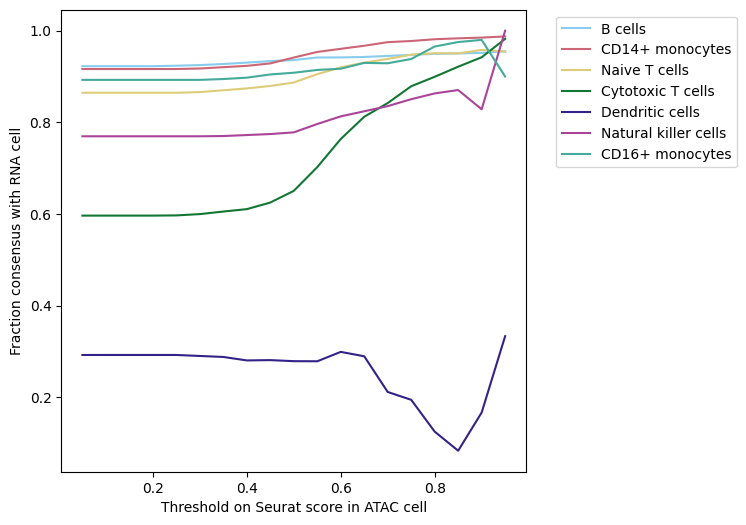

In [139]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.lineplot(
    data=true_fractions_by_cell_type_df,
    x="threshold",
    y="fraction_true",
    hue="cell_type_alias",
    hue_order=cell_type_alias_order,
    palette=cell_type_alias_color_dict,
    ax=ax,
)
ax.set_xlabel("Threshold on Seurat score in ATAC cell")
ax.set_ylabel("Fraction consensus with RNA cell")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")

plt.savefig("seurat_validation_cumulative.png", facecolor="white", dpi=600)
plt.savefig("seurat_validation_cumulative.svg", facecolor="white", dpi=600)